In [127]:
# Loading libraries
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,8.27
%matplotlib inline

In [128]:
# Loading dataset
data = pd.read_csv('cpi.csv')
data.head()

,Country,Region,Score,Surveys,Error,Lower,Upper,year
0,Denmark,EU,90.0,7.0,2.0,87.0,93.0,2012
1,Finland,EU,90.0,7.0,3.0,85.0,95.0,2012
2,New Zealand,AP,90.0,7.0,2.2,87.0,94.0,2012
3,Sweden,EU,88.0,7.0,1.9,85.0,91.0,2012
4,Singapore,AP,87.0,9.0,2.1,83.0,90.0,2012


# Variance by year

In [129]:
data.head()

,Country,Region,Score,Surveys,Error,Lower,Upper,year
0,Denmark,EU,90.0,7.0,2.0,87.0,93.0,2012
1,Finland,EU,90.0,7.0,3.0,85.0,95.0,2012
2,New Zealand,AP,90.0,7.0,2.2,87.0,94.0,2012
3,Sweden,EU,88.0,7.0,1.9,85.0,91.0,2012
4,Singapore,AP,87.0,9.0,2.1,83.0,90.0,2012


In [145]:
by_year = pd.crosstab(data.Country, data.year, data.Score, aggfunc=sum)
by_year.to_csv('cpi_by_year.csv')
len(by_year)

197

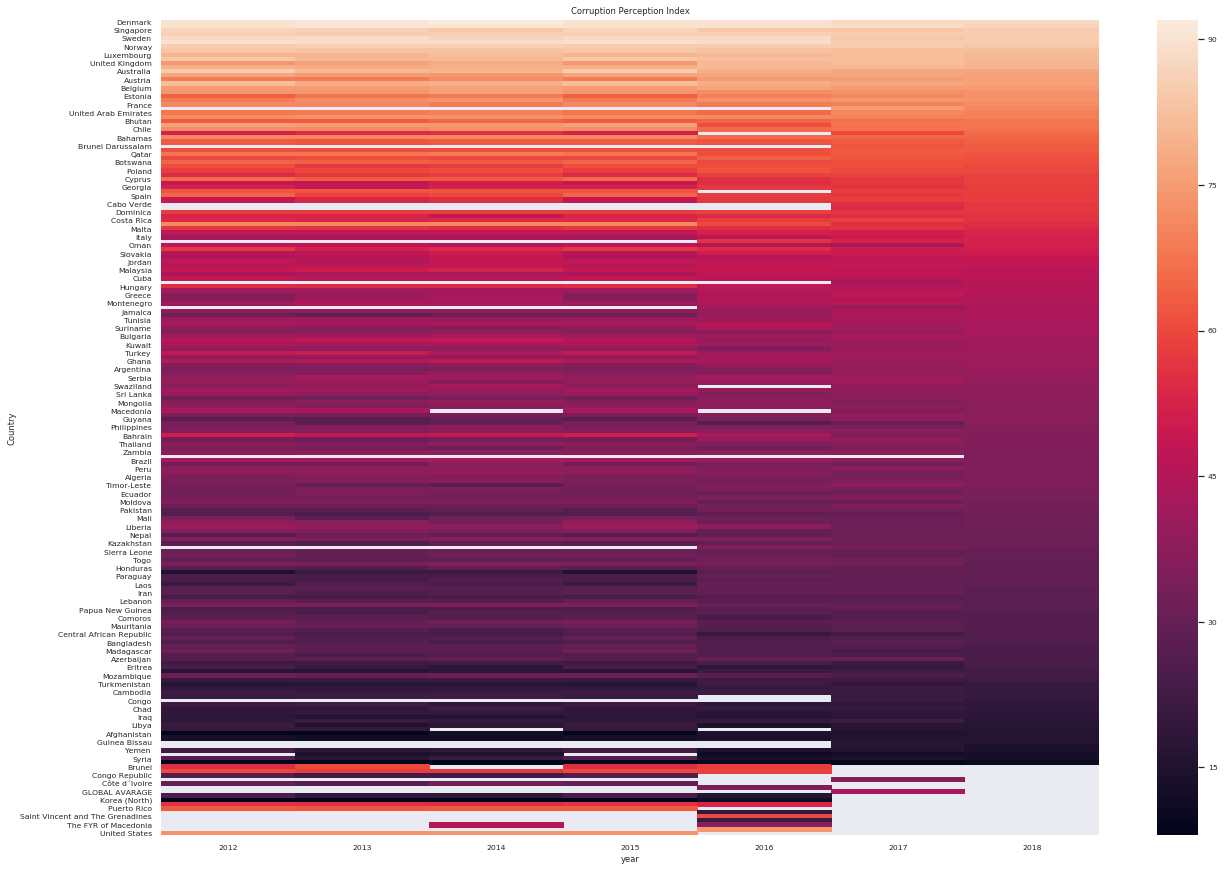

In [146]:
sns.set(rc={'figure.figsize':(21, 15)})
sns.set(font_scale=0.7)
sns.heatmap(by_year.sort_values(2018, ascending=False))
plt.title('Corruption Perception Index')
plt.savefig('cpi_heatmap.png')

Text(0.5, 1.0, 'Corruption Perpcetion Index')

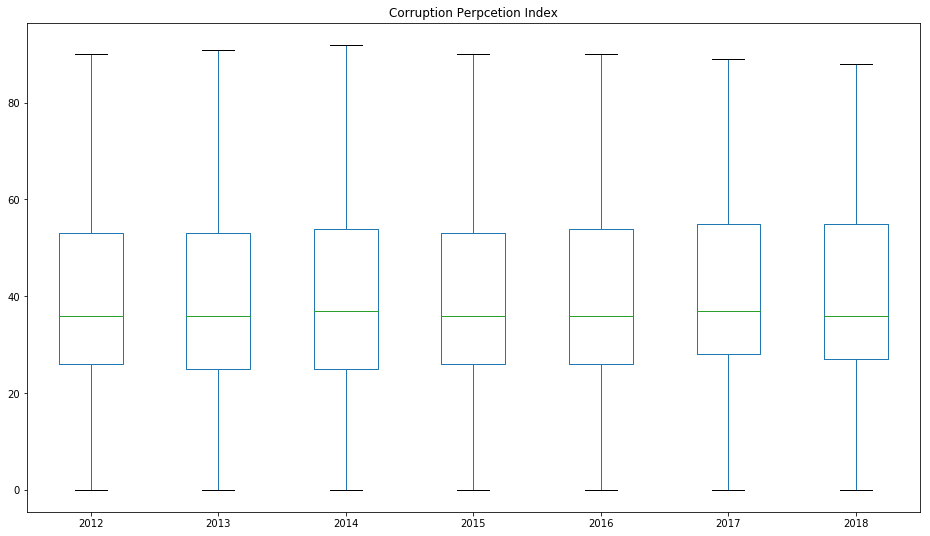

In [116]:
by_year.boxplot(grid=False, figsize=(16,9))
plt.title('Corruption Perpcetion Index')

In [117]:
samples = tuple((by_year[col].to_list() for col in by_year.columns))
stats.f_oneway(
    by_year[2012].to_list(),
    by_year[2013].to_list(),
    by_year[2014].to_list(),
    by_year[2015].to_list(),
    by_year[2016].to_list(),
    by_year[2017].to_list(),
    by_year[2018].to_list(),
)

F_onewayResult(statistic=0.09857638062439561, pvalue=0.9965292112047466)